# Import & Generate Sinyal + Filter

(Ini bagian fungsi generator & filter suara)

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter

def generate_sine_wave(freq, fs, duration, amplitude=0.5):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    return amplitude * np.sin(2 * np.pi * freq * t)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)


Penjelasan:


- Fungsi generate_sine_wave digunakan untuk membuat suara berbentuk gelombang sinus (frekuensi tertentu).

- Fungsi butter_bandpass dan bandpass_filter digunakan agar suara yang dihasilkan hanya di dalam rentang pendengaran manusia (20 Hz – 20.000 Hz).

- Filter ini penting untuk menghindari noise atau suara berfrekuensi tidak diinginkan.

# Visualisasi Gelombang & Spektrum

(Menampilkan bentuk gelombang, spektrum, & hasil tes)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_waveform(signal, fs, title="Waveform"):
    t = np.arange(len(signal)) / fs
    plt.figure(figsize=(10, 3))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

def plot_spectrum(signal, fs, title="Frequency Spectrum"):
    n = len(signal)
    freq = np.fft.rfftfreq(n, 1/fs)
    fft_magnitude = np.abs(np.fft.rfft(signal))
    plt.figure(figsize=(10, 4))
    plt.plot(freq, fft_magnitude)
    plt.title(title)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(0, 20000)
    plt.grid(True)
    plt.show()

def plot_result(results):
    colors = {'y': 'green', 's': 'orange', 'n': 'red'}
    plt.figure(figsize=(12, 5))
    for freq, resp in results.items():
        plt.scatter(freq, 1, color=colors[resp], s=200)
    plt.yticks([])
    plt.xticks(list(results.keys()), rotation=45)
    plt.xlabel("Frekuensi (Hz)")
    plt.title("Hasil Tes Pendengaran")
    plt.grid(axis='x')

    legend_handles = [
        mpatches.Patch(color='green', label='Jelas (Ya)'),
        mpatches.Patch(color='orange', label='Samar'),
        mpatches.Patch(color='red', label='Tidak')
    ]
    plt.legend(handles=legend_handles, loc='upper right')
    plt.show()


Penjelasan:


- plot_waveform menampilkan bentuk sinyal dalam domain waktu (amplitudo vs waktu).

- plot_spectrum menampilkan spektrum frekuensi hasil FFT (untuk melihat frekuensi yang dominan).

- plot_result menampilkan hasil tes dengan warna sesuai respon (hijau, oranye, merah).

# Jalankan Tes & Ambil Respon User

(Memainkan suara + ambil input user per frekuensi)

In [6]:
from IPython.display import Audio, display

def run_test(frequencies, fs, duration):
    results = {}
    print("=== Tes Pendengaran Dimulai ===")
    print("Ketik 'y' = Dengar jelas, 's' = Samar, 'n' = Tidak terdengar")

    for freq in frequencies:
        print(f"\n🔊 Memainkan frekuensi: {freq} Hz")
        sine_wave = generate_sine_wave(freq, fs, duration)
        filtered_wave = bandpass_filter(sine_wave, 20, 20000, fs)

        plot_waveform(filtered_wave, fs, title=f"Waveform {freq} Hz")
        plot_spectrum(filtered_wave, fs, title=f"Spektrum {freq} Hz")
        display(Audio(filtered_wave, rate=fs, autoplay=True))

        resp = input(f"Apakah kamu mendengar suara {freq} Hz? (y=jelas / s=samar / n=tidak): ").strip().lower()
        while resp not in ['y', 's', 'n']:
            resp = input("Input tidak valid. Ketik 'y', 's', atau 'n': ").strip().lower()
        results[freq] = resp

    return results


 Penjelasan:
 

- Untuk setiap frekuensi, suara diputar & divisualisasikan.

- User mendengarkan lalu menjawab pakai input ('y', 's', 'n').

- Jawaban disimpan di dictionary results.

- Tes berjalan satu per satu.

# Analisis & Kesimpulan Hasil Tes

(Cek apakah pendengaran user normal atau tidak)

In [7]:
def print_conclusion(results):
    hearing_freqs = [f for f, r in results.items() if r in ['y', 's']]

    print("\n=== Kesimpulan ===")
    if not hearing_freqs:
        print("❗ Kamu tidak mendengar frekuensi apapun. Disarankan konsultasi ke dokter THT.")
    else:
        lowest_heard = min(hearing_freqs)
        highest_heard = max(hearing_freqs)
        print(f"Kamu dapat mendengar dari {lowest_heard} Hz hingga {highest_heard} Hz.")
        if highest_heard < 16000:
            print("⚠️ Kamu kesulitan mendengar frekuensi tinggi, coba konsultasi ke dokter THT.")
        else:
            print("✅ Pendengaran kamu masih dalam rentang normal (20–16.000 Hz).")


Penjelasan:


- Jika user tidak bisa mendengar apa pun → peringatan keras.

- Jika user bisa mendengar, dicetak range frekuensi yang terdengar.

- Jika batas atas < 16.000 Hz → disarankan cek ke THT.

- Jika normal → pendengaran aman.

# Main Program / Eksekusi Tes

(Bagian yang dipanggil user untuk menjalankan semuanya)

=== Tes Pendengaran Dimulai ===
Ketik 'y' = Dengar jelas, 's' = Samar, 'n' = Tidak terdengar

🔊 Memainkan frekuensi: 125 Hz


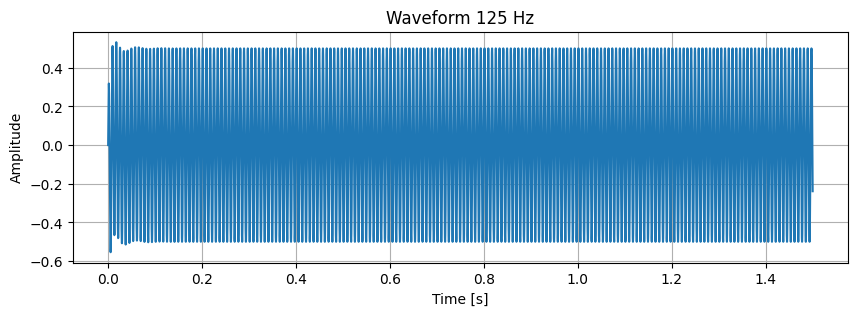

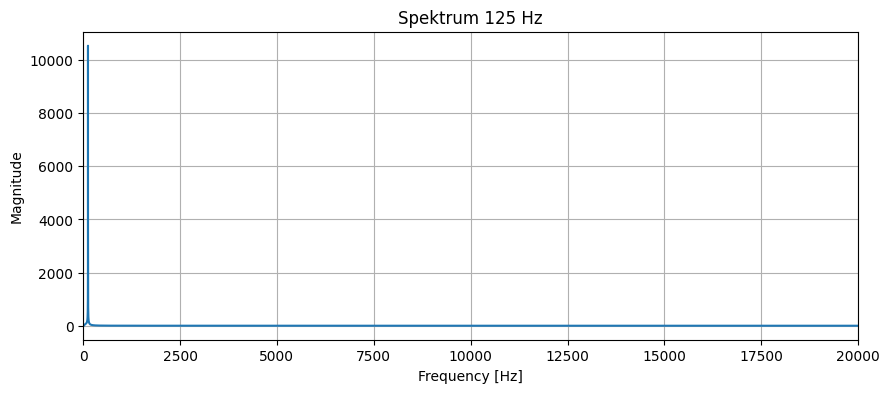

Apakah kamu mendengar suara 125 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 250 Hz


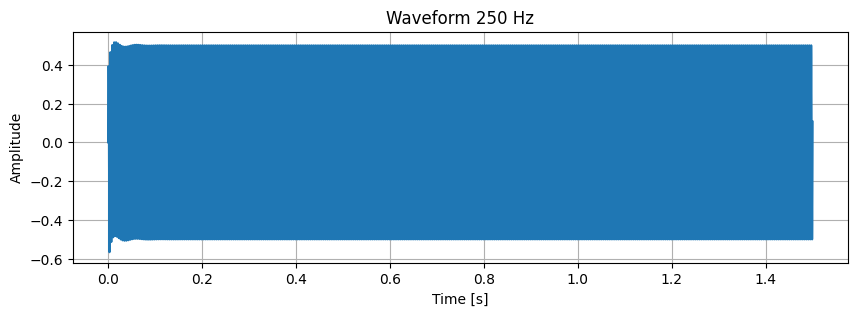

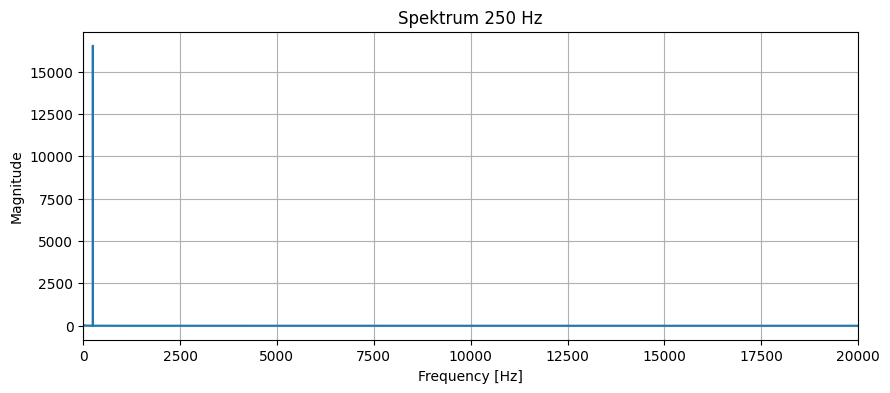

Apakah kamu mendengar suara 250 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 500 Hz


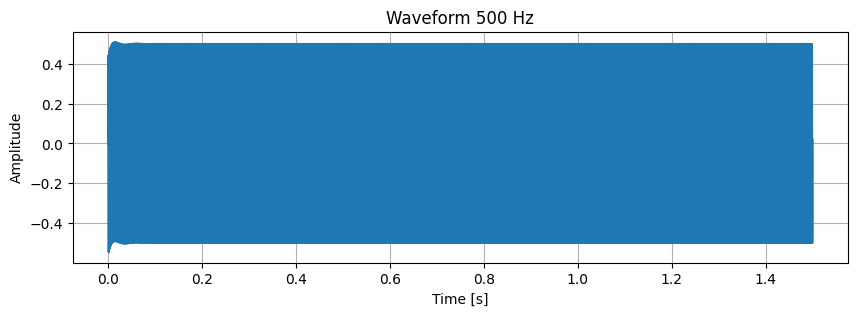

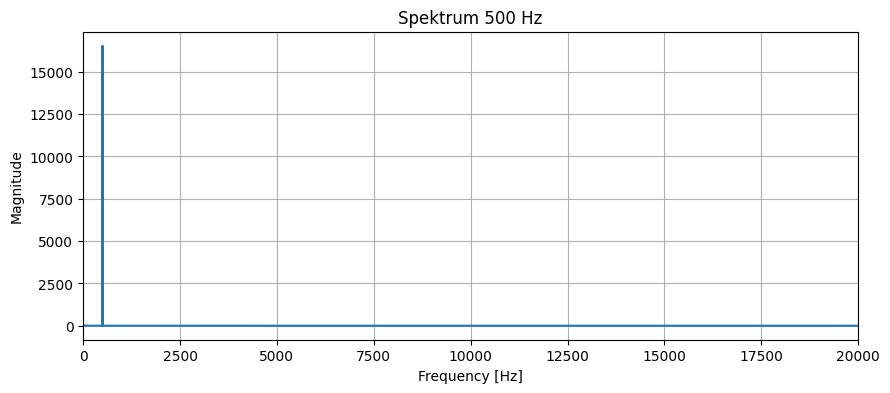

Apakah kamu mendengar suara 500 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 1000 Hz


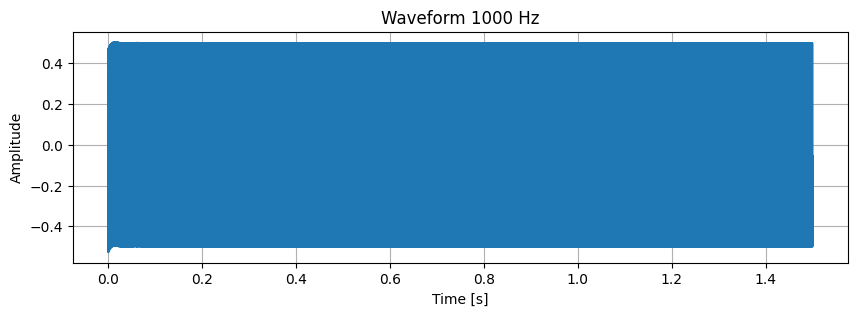

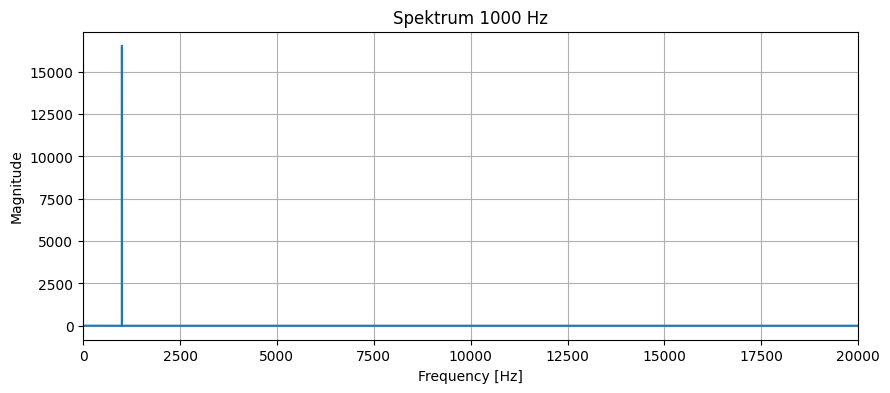

Apakah kamu mendengar suara 1000 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 2000 Hz


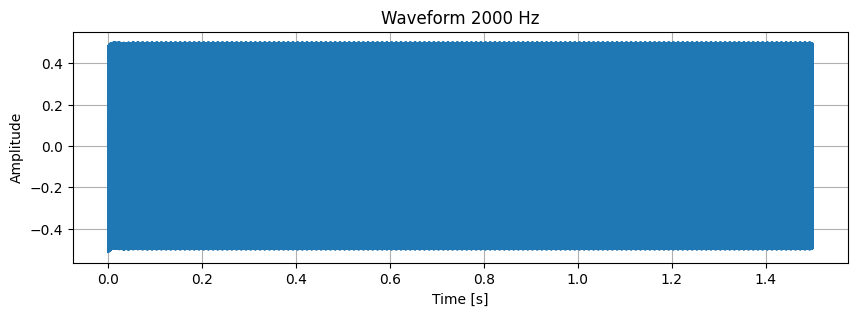

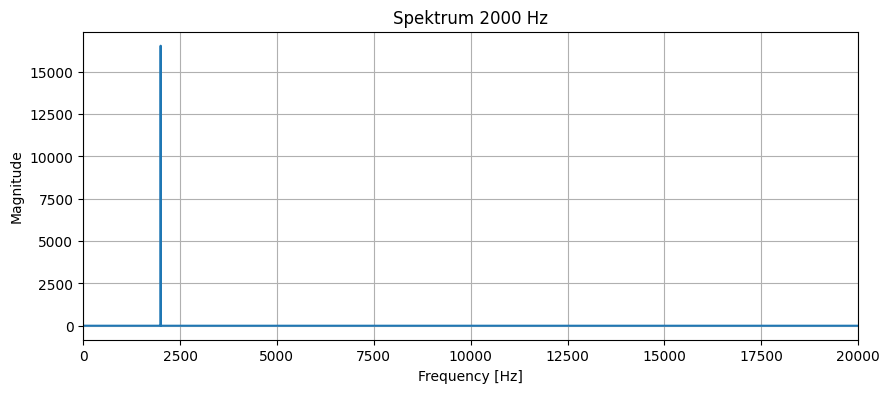

Apakah kamu mendengar suara 2000 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 4000 Hz


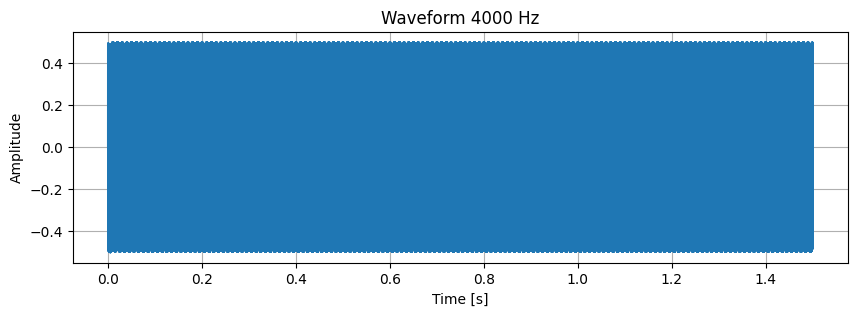

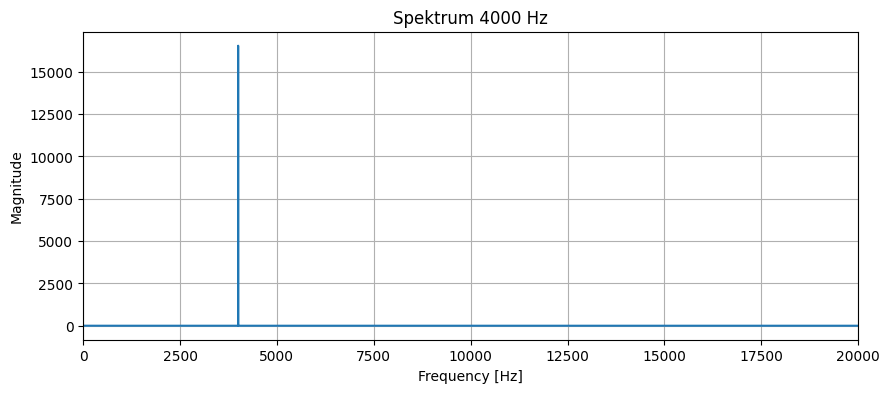

Apakah kamu mendengar suara 4000 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 6000 Hz


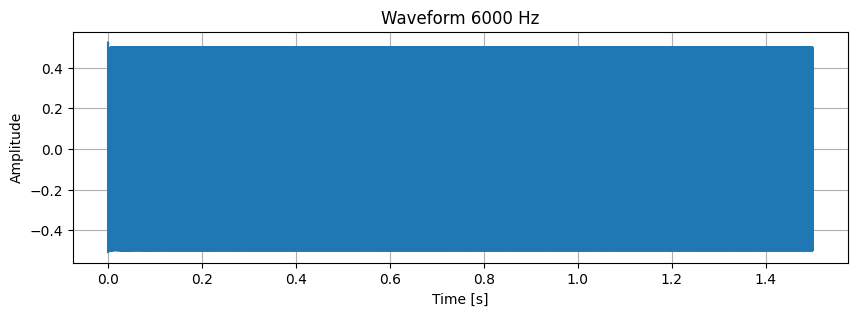

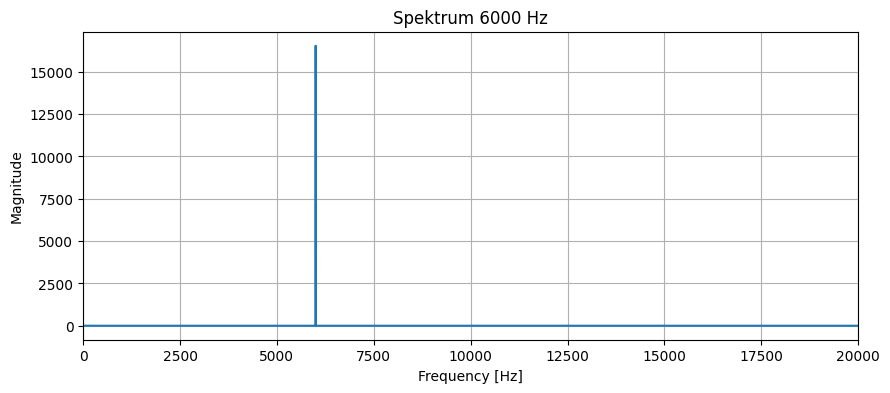

Apakah kamu mendengar suara 6000 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 8000 Hz


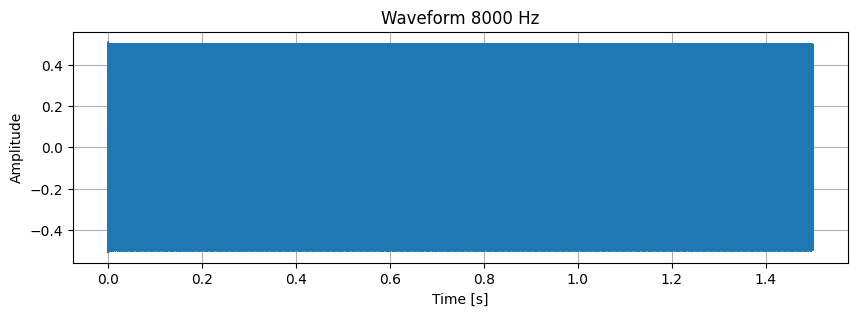

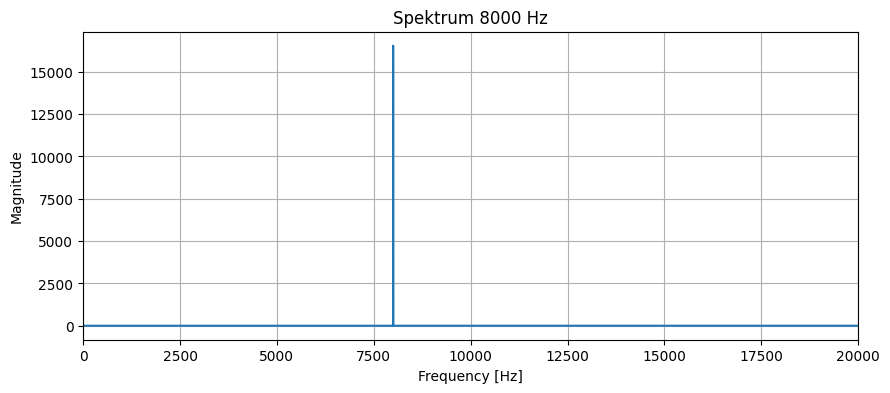

Apakah kamu mendengar suara 8000 Hz? (y=jelas / s=samar / n=tidak):  y



🔊 Memainkan frekuensi: 12000 Hz


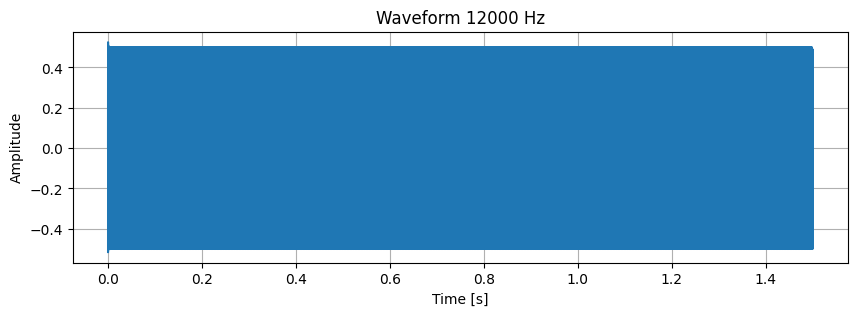

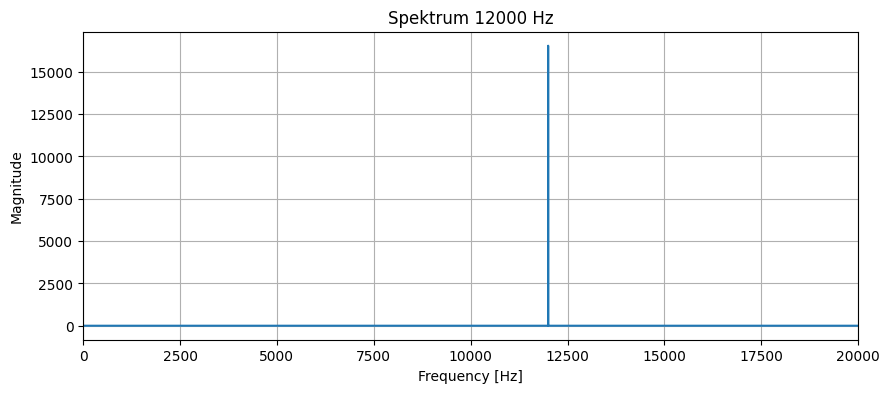

Apakah kamu mendengar suara 12000 Hz? (y=jelas / s=samar / n=tidak):  s



🔊 Memainkan frekuensi: 16000 Hz


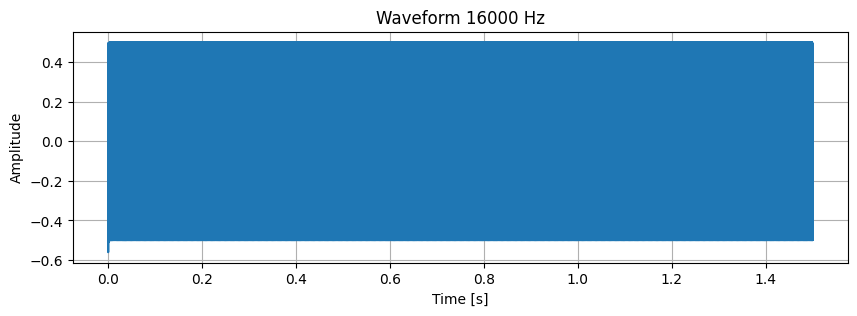

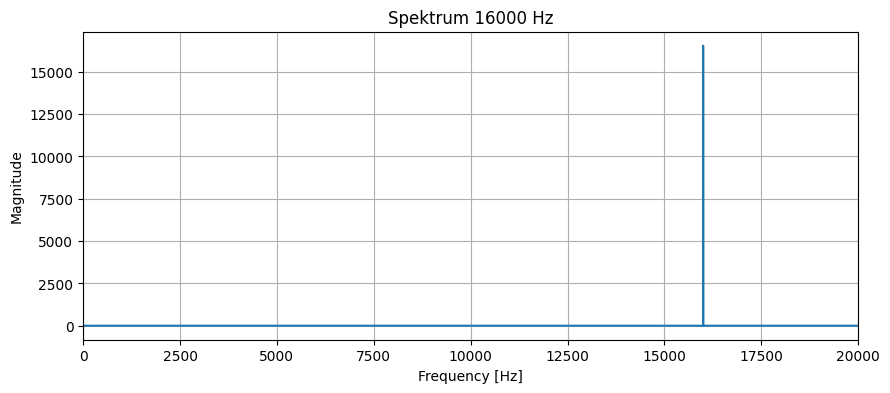

Apakah kamu mendengar suara 16000 Hz? (y=jelas / s=samar / n=tidak):  s


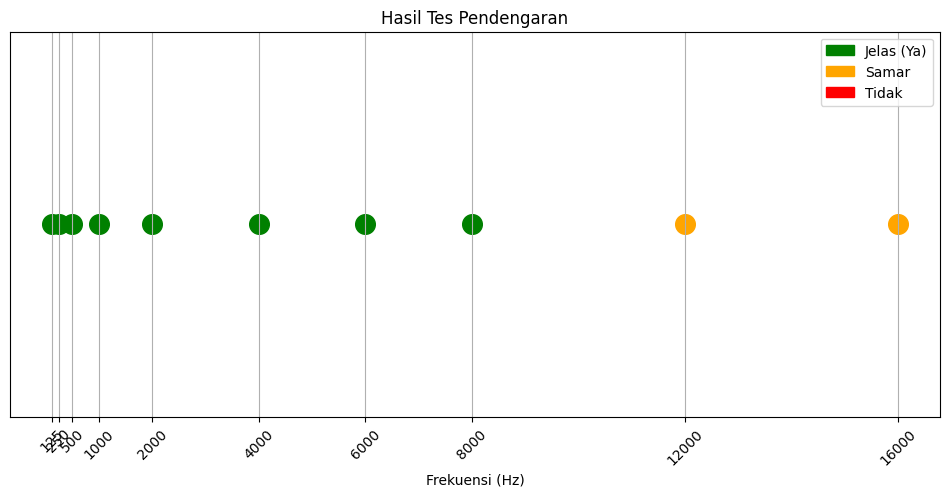


=== Kesimpulan ===
Kamu dapat mendengar dari 125 Hz hingga 16000 Hz.
✅ Pendengaran kamu masih dalam rentang normal (20–16.000 Hz).


In [8]:
# Konfigurasi
fs = 44100
duration = 1.5
frequencies = [125, 250, 500, 1000, 2000, 4000, 6000, 8000, 12000, 16000]

# Jalankan Tes
results = run_test(frequencies, fs, duration)

# Visualisasi
plot_result(results)

# Kesimpulan
print_conclusion(results)


Penjelasan:


- Inisialisasi parameter tes: sampling rate, durasi, daftar frekuensi.

- Jalankan semua fungsi (run_test, plot_result, print_conclusion).

- Ini bagian utama yang memanggil seluruh sistem.